### Feature Extraction

In [42]:
import pandas as pd
import numpy as np
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


## Dataset

In [43]:
fazeli_mitbih_train_df = pd.read_csv('../data/mitbih_train.csv', header=None)

In [44]:
column_187 = fazeli_mitbih_train_df.iloc[:, 187]
column_187.value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: 187, dtype: int64

## Comprehensive Feature Extraction

using tsfresh time series comprehensive feature extraction package

In [5]:
import pandas as pd
from tsfresh import extract_features
from tsfresh.feature_extraction import ComprehensiveFCParameters

# Load your dataset
fazeli_mitbih_train_df = pd.read_csv('../data/mitbih_train.csv', header=None)

# Assign a unique ID to each row and separate the target variable
fazeli_mitbih_train_df['id'] = range(len(fazeli_mitbih_train_df))
target_series = fazeli_mitbih_train_df[187]

# Keep only features and the unique ID for feature extraction
fazeli_mitbih_train_df_features_only = fazeli_mitbih_train_df.drop(columns=[187])

# Convert to long format, preserving the 'id' for direct mapping
long_df = fazeli_mitbih_train_df_features_only.melt(id_vars='id', var_name='time', value_name='amplitude')

# Define feature extraction settings
extraction_settings = ComprehensiveFCParameters()

# Incremental extraction setup
unique_ids = long_df['id'].unique()
subset_size = 10000  # Adjust based on your dataset size and memory constraints
extracted_features_list = []

for i in range(0, len(unique_ids), subset_size):
    subset_ids = unique_ids[i:i+subset_size]
    subset_df = long_df[long_df['id'].isin(subset_ids)]
    
    # Extract features for this subset
    subset_features = extract_features(subset_df, column_id='id', column_sort='time',
                                       default_fc_parameters=extraction_settings, n_jobs=7)
    extracted_features_list.append(subset_features)



Feature Extraction: 100%|███████████████████████| 35/35 [00:51<00:00,  1.49s/it]


In [45]:

# Combine extracted features from all subsets
extracted_features = pd.concat(extracted_features_list)

# Re-associate the target labels using the 'id' column
# This step correctly maps the original labels to the extracted features based on 'id'
extracted_features['label'] = extracted_features.index.map(lambda idx: target_series.loc[idx])

# Verify the re-association of labels
print(extracted_features[['label']].head())


   label
0    0.0
1    0.0
2    0.0
3    0.0
4    0.0


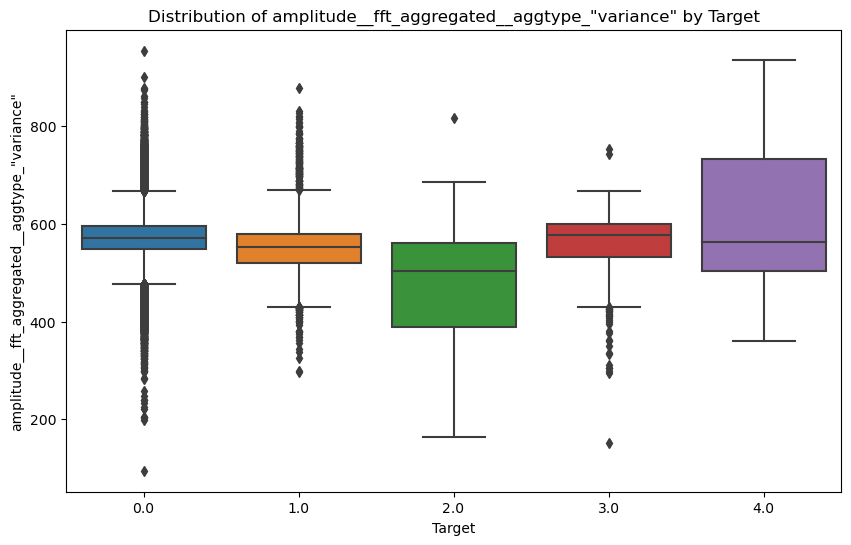

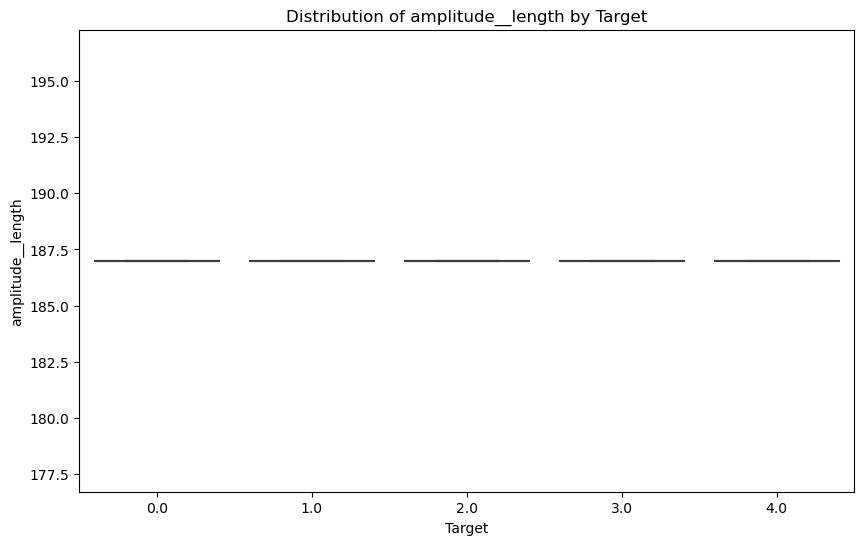

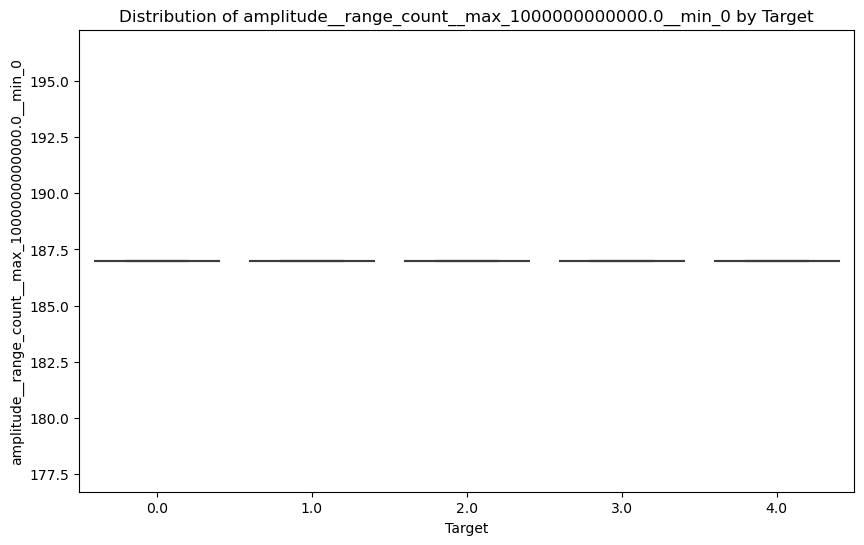

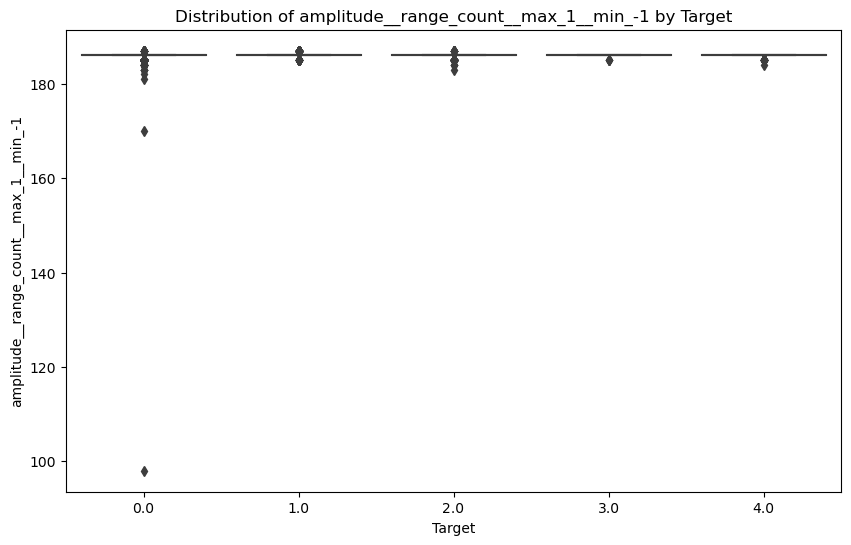

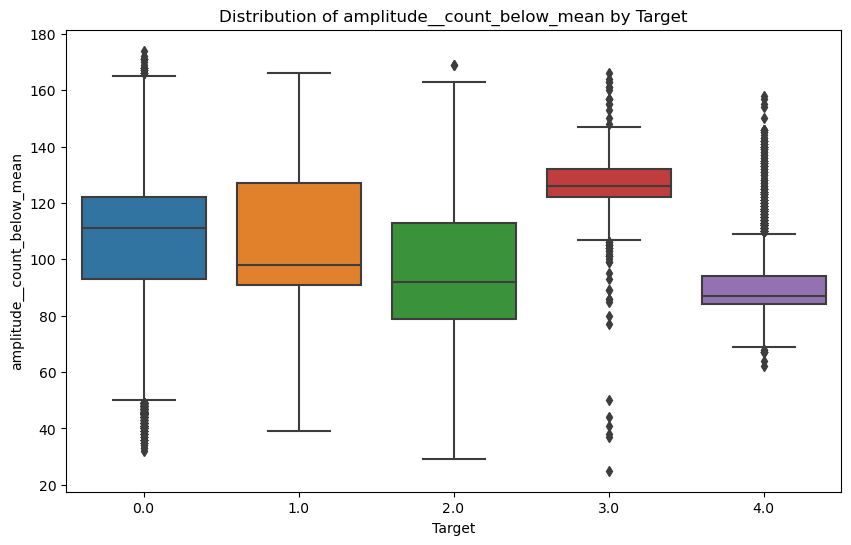

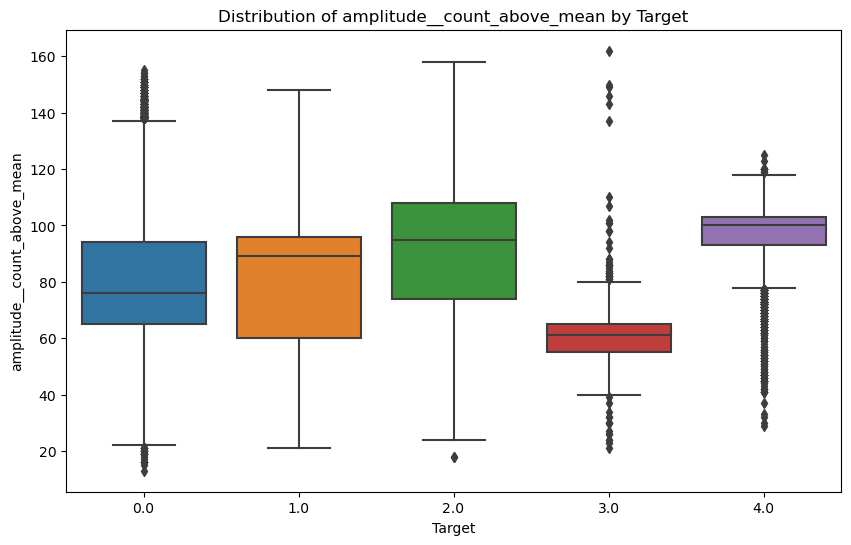

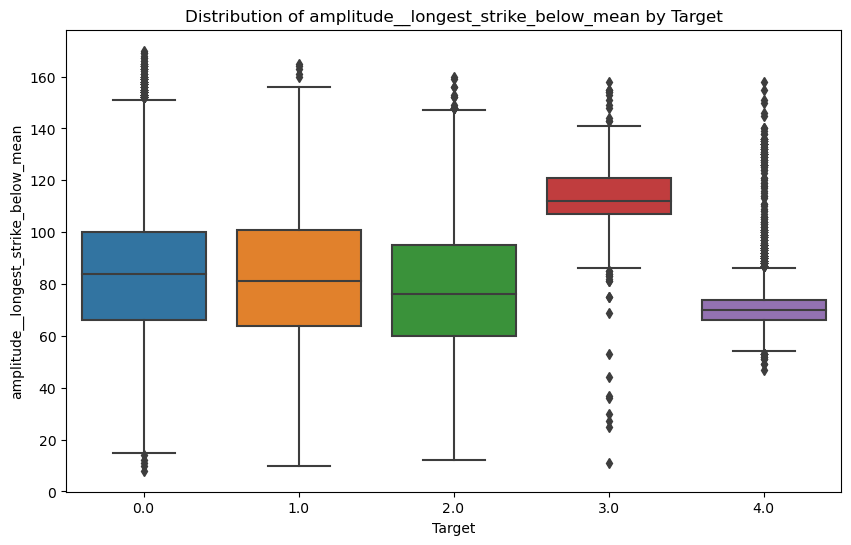

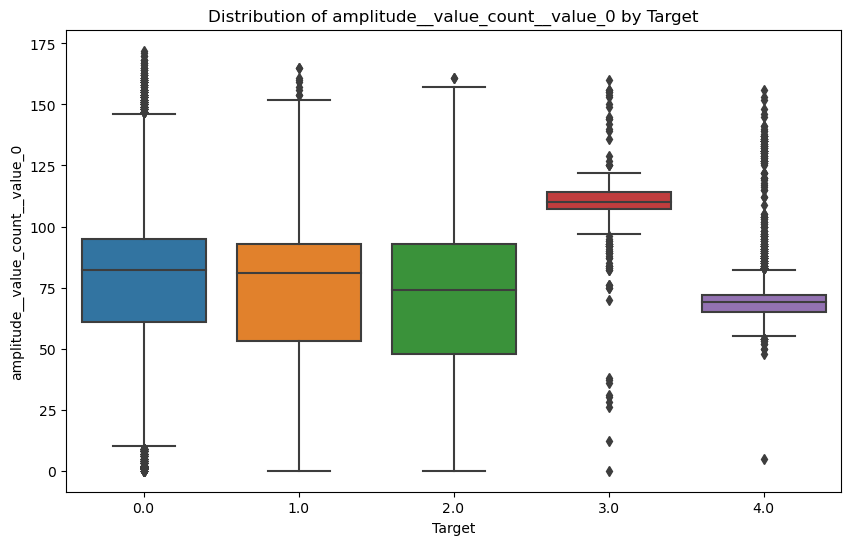

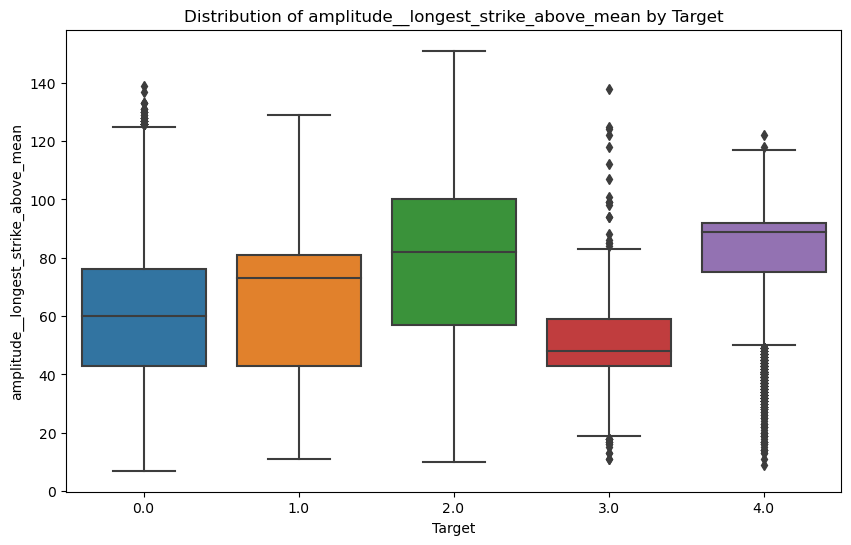

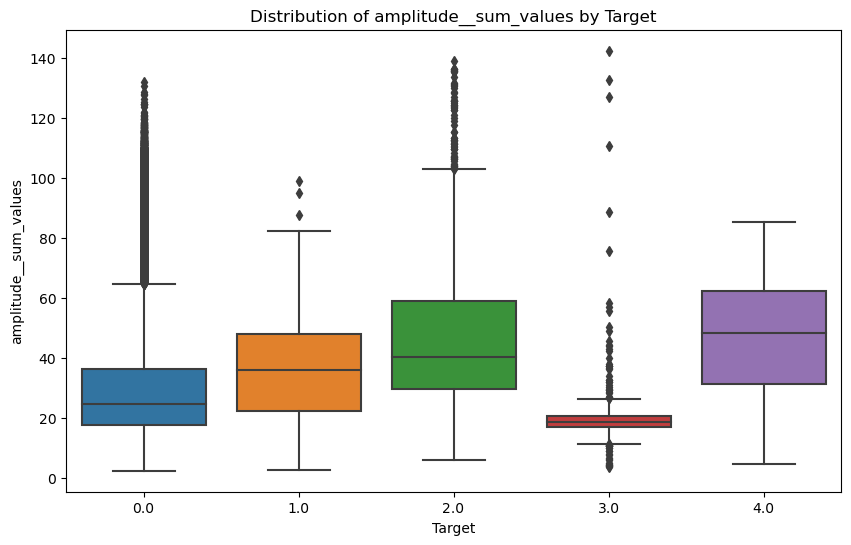

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify the most important features (you can choose based on your criteria)
top_features = extracted_features.drop(columns='label').mean().nlargest(10).index

# Plot the most important features hued by the target variable
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='label', y=feature, data=extracted_features)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel('Target')
    plt.ylabel(feature)
    plt.show()


In [51]:
import pandas as pd

# Compute the correlation matrix
correlation_matrix = extracted_features.corr()

# Extract the correlation values with the target variable
correlation_with_target = correlation_matrix['label'].abs()

# Sort the features based on their correlation with the target variable
top_features = correlation_with_target.nlargest(10).index

# Print the top features
print("Top 10 Features based on Correlation with Target:")
print(top_features)


Top 10 Features based on Correlation with Target:
Index(['label',
       'amplitude__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)',
       'amplitude__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)',
       'amplitude__friedrich_coefficients__coeff_3__m_3__r_30',
       'amplitude__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)',
       'amplitude__friedrich_coefficients__coeff_2__m_3__r_30',
       'amplitude__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)',
       'amplitude__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"var"',
       'amplitude__cwt_coefficients__coeff_10__w_2__widths_(2, 5, 10, 20)',
       'amplitude__friedrich_coefficients__coeff_1__m_3__r_30'],
      dtype='object')


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


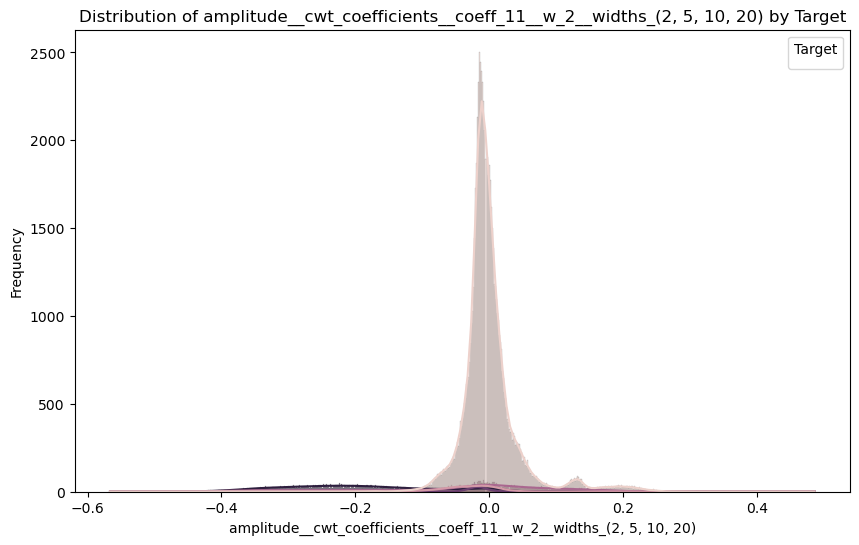

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


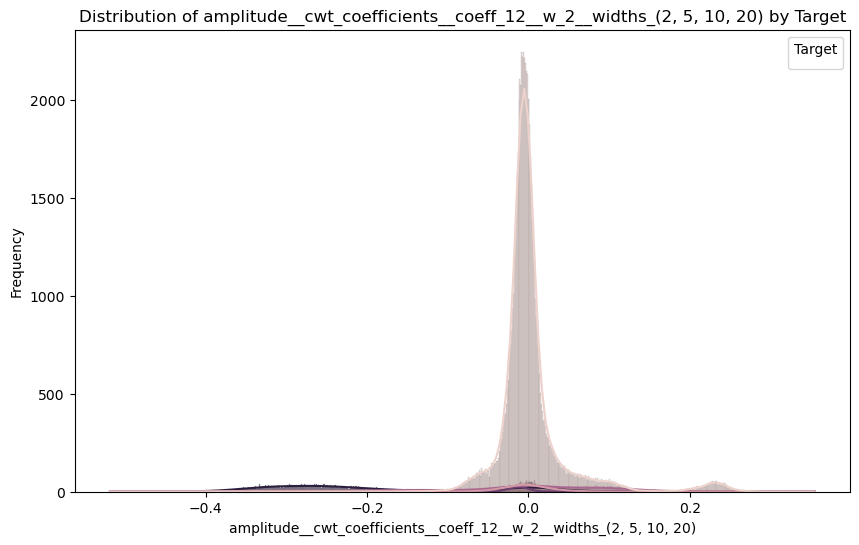

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


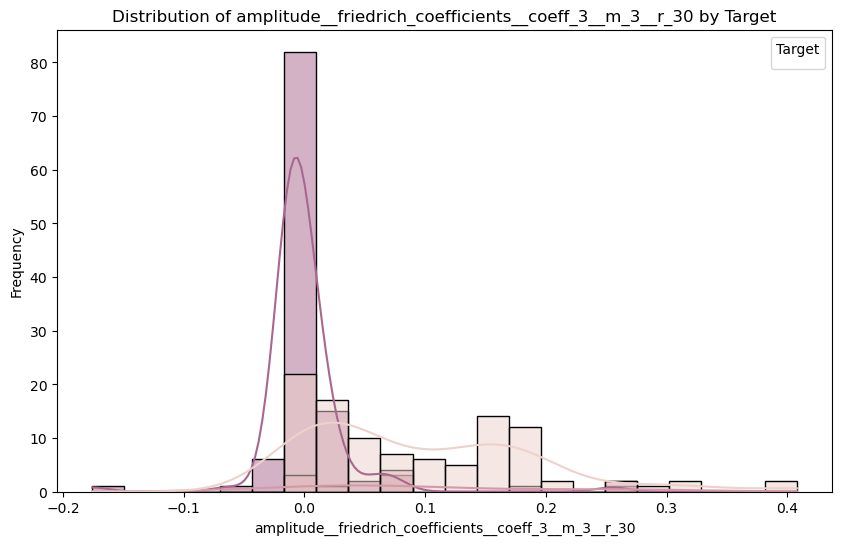

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


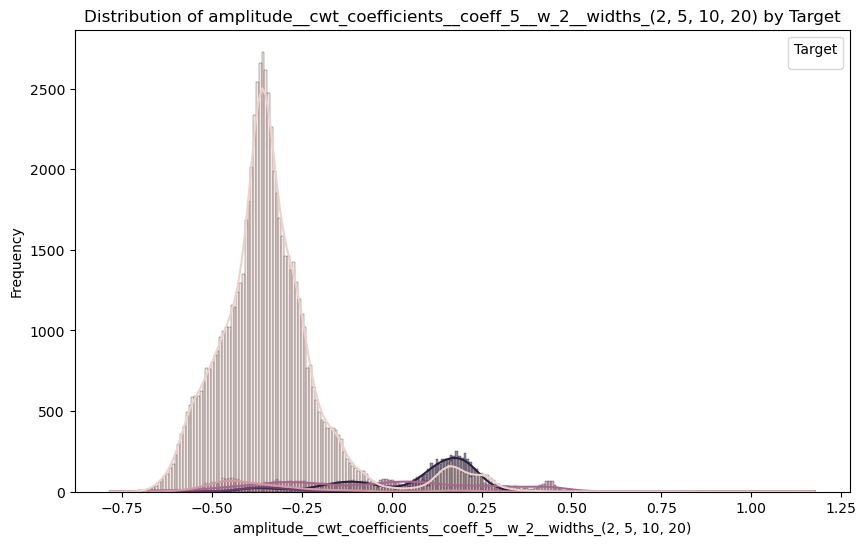

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


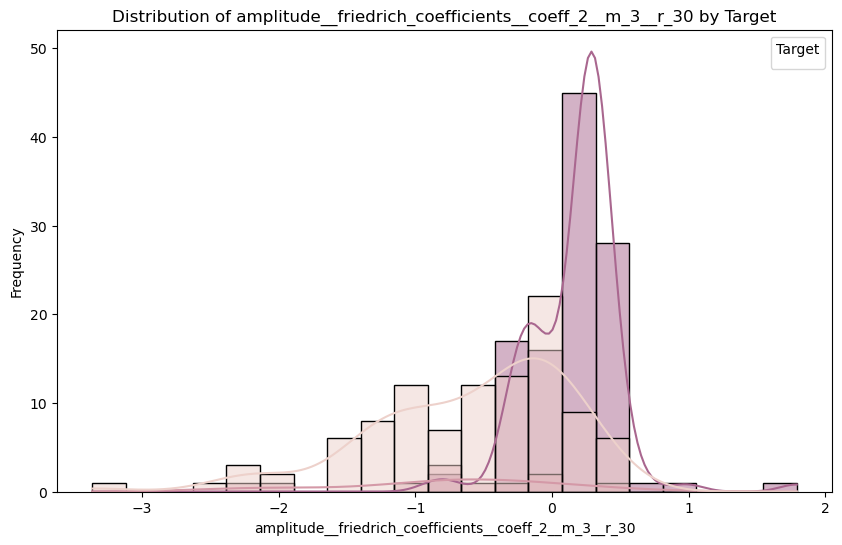

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


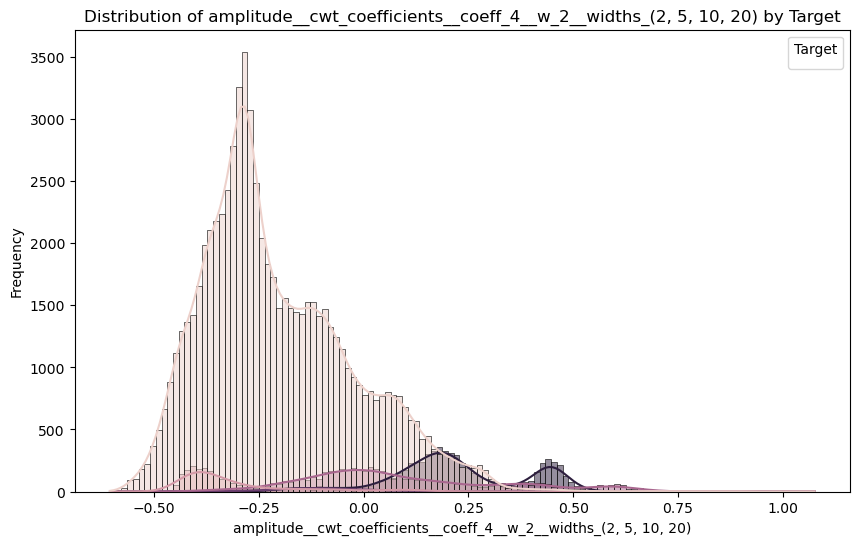

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


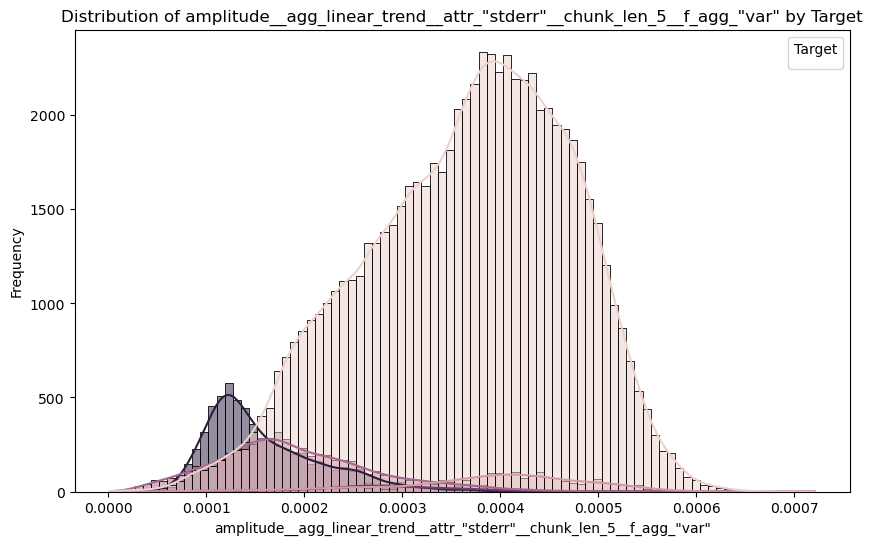

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


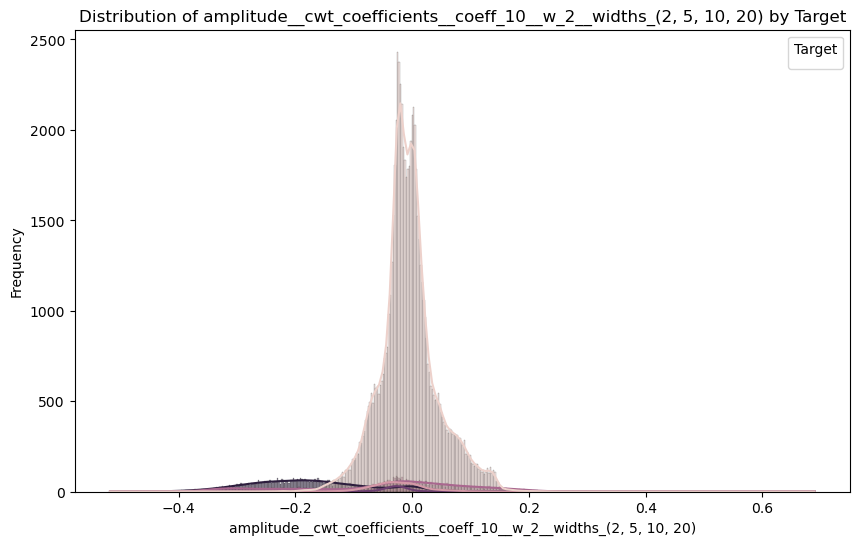

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


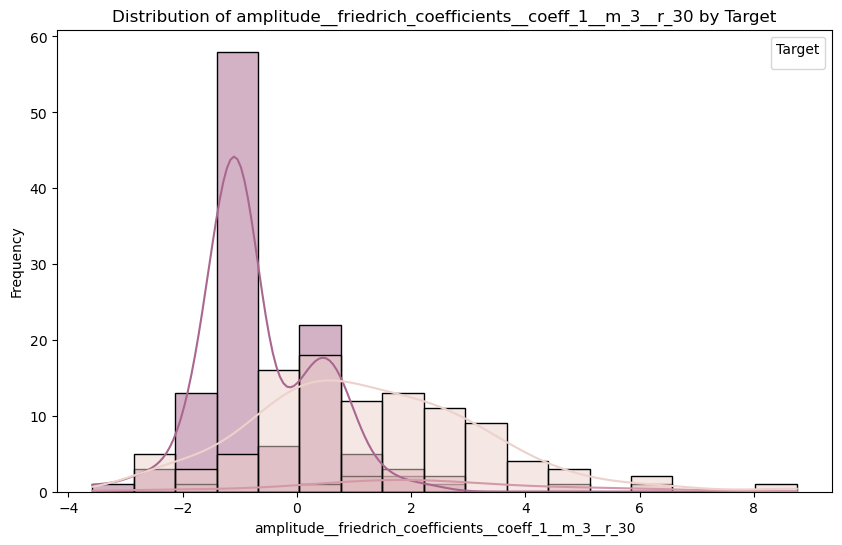

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 features
top_features = [
    'amplitude__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)',
    'amplitude__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)',
    'amplitude__friedrich_coefficients__coeff_3__m_3__r_30',
    'amplitude__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)',
    'amplitude__friedrich_coefficients__coeff_2__m_3__r_30',
    'amplitude__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)',
    'amplitude__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"var"',
    'amplitude__cwt_coefficients__coeff_10__w_2__widths_(2, 5, 10, 20)',
    'amplitude__friedrich_coefficients__coeff_1__m_3__r_30'
]

# Plot histograms of the top features hued by the target variable
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=extracted_features, x=feature, hue='label', kde=True)
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Target')
    plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


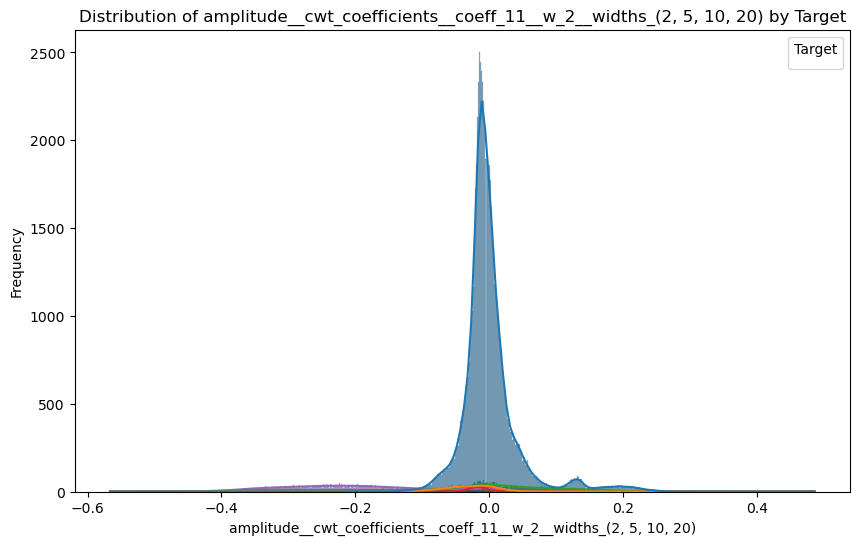

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


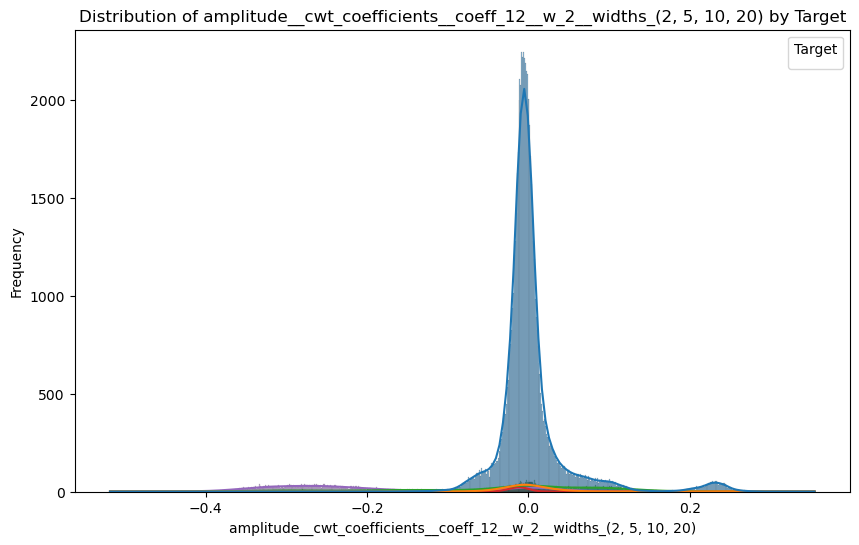

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


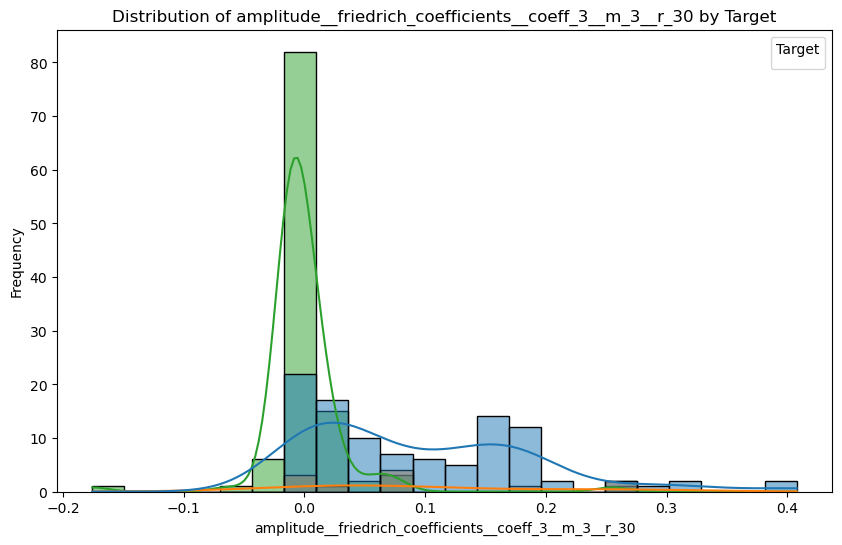

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


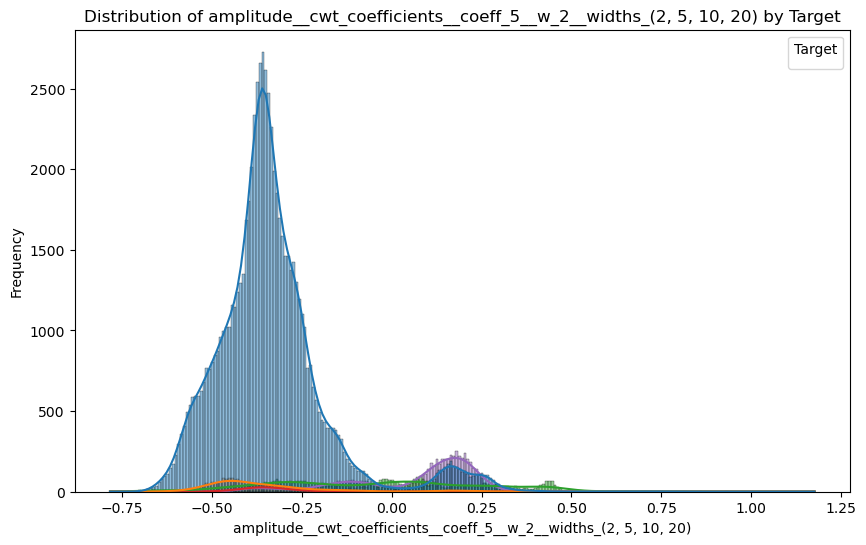

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


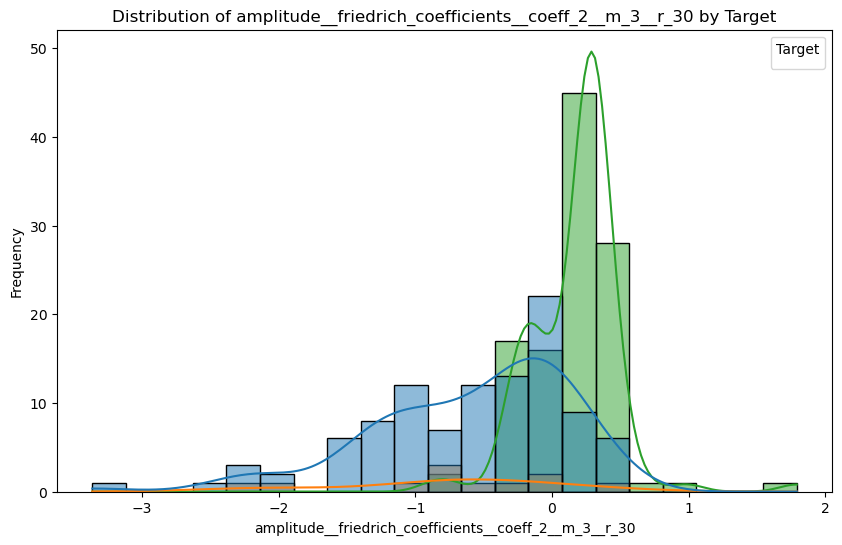

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


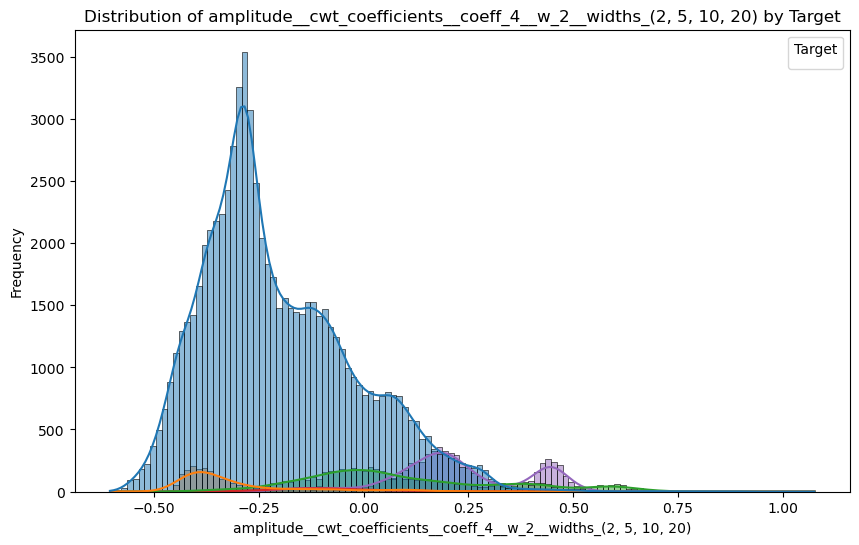

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


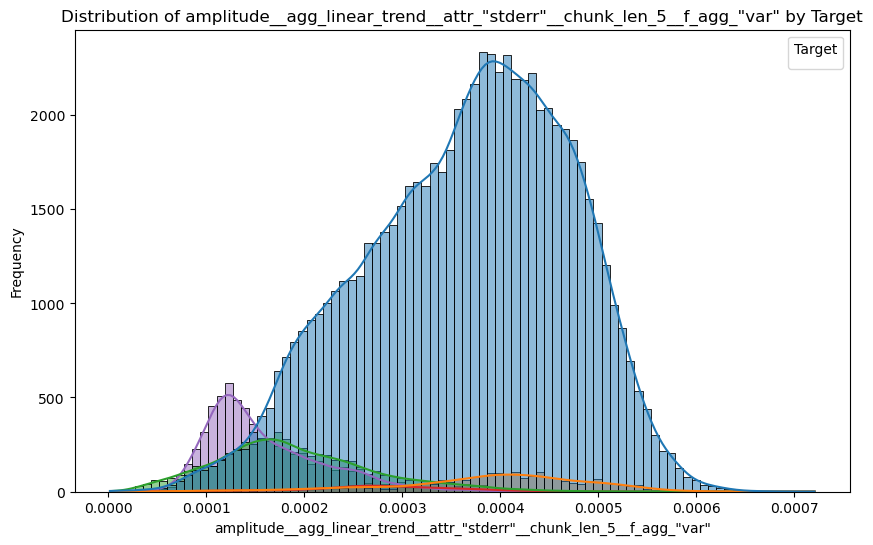

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


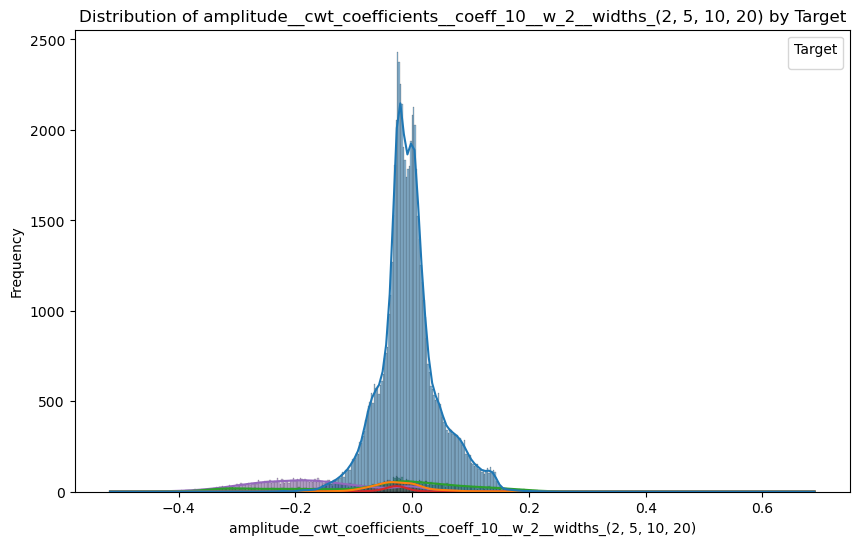

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


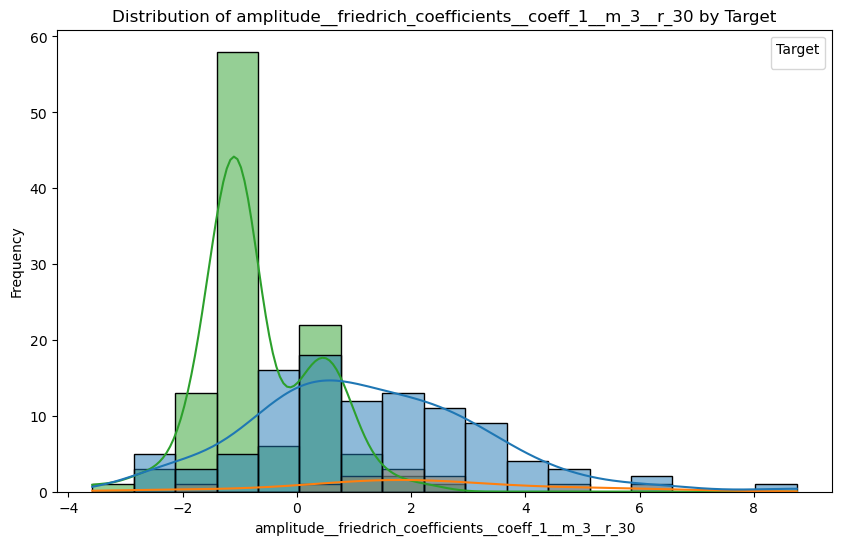

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select the top 10 features
top_features = [
    'amplitude__cwt_coefficients__coeff_11__w_2__widths_(2, 5, 10, 20)',
    'amplitude__cwt_coefficients__coeff_12__w_2__widths_(2, 5, 10, 20)',
    'amplitude__friedrich_coefficients__coeff_3__m_3__r_30',
    'amplitude__cwt_coefficients__coeff_5__w_2__widths_(2, 5, 10, 20)',
    'amplitude__friedrich_coefficients__coeff_2__m_3__r_30',
    'amplitude__cwt_coefficients__coeff_4__w_2__widths_(2, 5, 10, 20)',
    'amplitude__agg_linear_trend__attr_"stderr"__chunk_len_5__f_agg_"var"',
    'amplitude__cwt_coefficients__coeff_10__w_2__widths_(2, 5, 10, 20)',
    'amplitude__friedrich_coefficients__coeff_1__m_3__r_30'
]

# Plot histograms of the top features hued by the target variable
for feature in top_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=extracted_features, x=feature, hue='label', kde=True, palette='tab10')
    plt.title(f'Distribution of {feature} by Target')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Target')
    plt.show()


## Taking a look at the extracted data

In [7]:
extracted_features.head()


,amplitude__variance_larger_than_standard_deviation,amplitude__has_duplicate_max,amplitude__has_duplicate_min,amplitude__has_duplicate,amplitude__sum_values,amplitude__abs_energy,amplitude__mean_abs_change,amplitude__mean_change,amplitude__mean_second_derivative_central,amplitude__median,...,amplitude__fourier_entropy__bins_10,amplitude__fourier_entropy__bins_100,amplitude__permutation_entropy__dimension_3__tau_1,amplitude__permutation_entropy__dimension_4__tau_1,amplitude__permutation_entropy__dimension_5__tau_1,amplitude__permutation_entropy__dimension_6__tau_1,amplitude__permutation_entropy__dimension_7__tau_1,amplitude__query_similarity_count__query_None__threshold_0.0,amplitude__mean_n_absolute_max__number_of_maxima_7,label
0,0.0,0.0,1.0,1.0,18.404412,7.608654,0.021940,-0.005258,0.000139,0.061275,...,0.903995,1.762151,1.351280,2.072257,2.679390,3.035473,3.193625,NaN,0.878501,0.0
1,0.0,0.0,1.0,1.0,16.831909,6.285631,0.027341,-0.005162,0.000262,0.054131,...,1.026019,1.990158,1.435273,2.349871,3.138213,3.652543,3.943556,NaN,0.787139,0.0
2,0.0,0.0,1.0,1.0,11.613513,4.322286,0.023162,-0.005376,0.000920,0.005405,...,1.499320,2.979340,1.336042,1.875466,2.328855,2.591505,2.767173,NaN,0.635521,0.0
3,0.0,0.0,1.0,1.0,15.723757,6.158557,0.022055,-0.004975,0.000702,0.002762,...,0.838260,1.840945,1.094078,1.610731,2.057330,2.384749,2.654145,NaN,0.774270,0.0
4,0.0,0.0,1.0,1.0,21.798122,9.020939,0.025493,-0.005200,-0.000089,0.056338,...,0.671328,1.387650,1.483448,2.451926,3.405371,3.963423,4.187547,NaN,0.898055,0.0


In [8]:
extracted_features.describe()

,amplitude__variance_larger_than_standard_deviation,amplitude__has_duplicate_max,amplitude__has_duplicate_min,amplitude__has_duplicate,amplitude__sum_values,amplitude__abs_energy,amplitude__mean_abs_change,amplitude__mean_change,amplitude__mean_second_derivative_central,amplitude__median,...,amplitude__fourier_entropy__bins_10,amplitude__fourier_entropy__bins_100,amplitude__permutation_entropy__dimension_3__tau_1,amplitude__permutation_entropy__dimension_4__tau_1,amplitude__permutation_entropy__dimension_5__tau_1,amplitude__permutation_entropy__dimension_6__tau_1,amplitude__permutation_entropy__dimension_7__tau_1,amplitude__query_similarity_count__query_None__threshold_0.0,amplitude__mean_n_absolute_max__number_of_maxima_7,label
count,87554.0,87554.000000,87554.000000,87554.0,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,...,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,87554.000000,0.0,87554.000000,87554.000000
mean,0.0,0.023688,0.991457,1.0,32.590912,15.258945,0.023042,-0.004772,0.000357,0.142976,...,0.562851,1.588951,1.282986,1.969711,2.560386,2.919686,3.128365,NaN,0.777526,0.473376
std,0.0,0.152077,0.092035,0.0,19.741782,14.093191,0.005651,0.001312,0.000420,0.167686,...,0.375591,0.616124,0.231689,0.413527,0.609587,0.719836,0.761024,NaN,0.103437,1.143184
min,0.0,0.000000,0.000000,1.0,2.421384,1.158800,0.005401,-0.005376,-0.002050,0.000000,...,0.058914,0.117714,0.219653,0.295241,0.361007,0.410061,0.458161,NaN,0.249524,0.000000
25%,0.0,0.000000,1.000000,1.0,18.325901,6.826498,0.020014,-0.005376,0.000128,0.000000,...,0.234966,1.070947,1.140293,1.709801,2.157420,2.445170,2.639438,NaN,0.714689,0.000000
50%,0.0,0.000000,1.000000,1.0,27.142751,10.381154,0.022538,-0.005327,0.000290,0.077381,...,0.469474,1.548911,1.277691,1.971678,2.553746,2.894872,3.085702,NaN,0.781926,0.000000
75%,0.0,0.000000,1.000000,1.0,40.751316,17.784661,0.025082,-0.004943,0.000566,0.240379,...,0.834404,2.026271,1.461635,2.261328,2.963590,3.376670,3.603133,NaN,0.848468,0.000000
max,0.0,1.000000,1.000000,1.0,142.500000,118.638845,0.154252,0.004981,0.002367,0.859702,...,1.746779,3.504805,1.790814,3.128108,4.428021,5.023066,5.190838,NaN,1.000000,4.000000


In [10]:
extracted_features.corr()

,amplitude__variance_larger_than_standard_deviation,amplitude__has_duplicate_max,amplitude__has_duplicate_min,amplitude__has_duplicate,amplitude__sum_values,amplitude__abs_energy,amplitude__mean_abs_change,amplitude__mean_change,amplitude__mean_second_derivative_central,amplitude__median,...,amplitude__fourier_entropy__bins_10,amplitude__fourier_entropy__bins_100,amplitude__permutation_entropy__dimension_3__tau_1,amplitude__permutation_entropy__dimension_4__tau_1,amplitude__permutation_entropy__dimension_5__tau_1,amplitude__permutation_entropy__dimension_6__tau_1,amplitude__permutation_entropy__dimension_7__tau_1,amplitude__query_similarity_count__query_None__threshold_0.0,amplitude__mean_n_absolute_max__number_of_maxima_7,label
amplitude__variance_larger_than_standard_deviation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude__has_duplicate_max,NaN,1.000000,0.133451,0.119244,0.136332,0.228387,0.125989,0.001846,0.002267,0.116830,...,0.009540,0.043230,0.002901,0.012075,0.014069,0.011601,0.003337,NaN,0.083052,NaN
amplitude__has_duplicate_min,NaN,0.133451,1.000000,0.593277,-0.413635,-0.296284,-0.269789,0.000859,-0.000620,-0.423520,...,0.003727,-0.042623,-0.326063,-0.341051,-0.348585,-0.336968,-0.316822,NaN,-0.218980,NaN
amplitude__has_duplicate,NaN,0.119244,0.593277,1.000000,-0.223085,-0.139274,-0.174652,0.000516,-0.000188,-0.225111,...,0.005123,-0.023405,-0.193660,-0.202601,-0.207105,-0.200125,-0.188103,NaN,-0.128519,NaN
amplitude__sum_values,NaN,0.136332,-0.413635,-0.223085,1.000000,0.917241,0.758727,-0.003460,0.001272,0.964491,...,0.008762,0.129707,0.765690,0.781500,0.787828,0.777999,0.756921,NaN,0.677046,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
amplitude__permutation_entropy__dimension_6__tau_1,NaN,0.011601,-0.336968,-0.200125,0.777999,0.536472,0.925349,-0.001895,-0.002913,0.633973,...,0.068091,0.244341,0.998265,0.999583,0.998724,1.000000,0.996570,NaN,0.862771,NaN
amplitude__permutation_entropy__dimension_7__tau_1,NaN,0.003337,-0.316822,-0.188103,0.756921,0.525439,0.923706,-0.001734,-0.003143,0.602572,...,0.084318,0.265567,0.998995,0.994977,0.991531,0.996570,1.000000,NaN,0.882485,NaN
amplitude__query_similarity_count__query_None__threshold_0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude__mean_n_absolute_max__number_of_maxima_7,NaN,0.083052,-0.218980,-0.128519,0.677046,0.538422,0.888025,-0.001400,-0.001032,0.505216,...,0.189045,0.364137,0.877411,0.858945,0.849453,0.862771,0.882485,NaN,1.000000,NaN


In [58]:
extracted_features.corr()

,amplitude__sum_values,amplitude__median,amplitude__mean,amplitude__length,amplitude__standard_deviation,amplitude__variance,amplitude__root_mean_square,amplitude__maximum,amplitude__absolute_maximum,amplitude__minimum,label
amplitude__sum_values,1.000000,0.964491,1.000000,NaN,0.658001,0.638319,0.972663,0.489145,0.489145,0.269220,NaN
amplitude__median,0.964491,1.000000,0.964491,NaN,0.476056,0.471184,0.893341,0.334110,0.334110,0.282702,NaN
amplitude__mean,1.000000,0.964491,1.000000,NaN,0.658001,0.638319,0.972663,0.489145,0.489145,0.269220,NaN
amplitude__length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude__standard_deviation,0.658001,0.476056,0.658001,NaN,1.000000,0.951542,0.802020,0.844907,0.844907,0.037310,NaN
amplitude__variance,0.638319,0.471184,0.638319,NaN,0.951542,1.000000,0.766281,0.688262,0.688262,0.021969,NaN
amplitude__root_mean_square,0.972663,0.893341,0.972663,NaN,0.802020,0.766281,1.000000,0.644206,0.644206,0.237905,NaN
amplitude__maximum,0.489145,0.334110,0.489145,NaN,0.844907,0.688262,0.644206,1.000000,1.000000,0.043066,NaN
amplitude__absolute_maximum,0.489145,0.334110,0.489145,NaN,0.844907,0.688262,0.644206,1.000000,1.000000,0.043066,NaN
amplitude__minimum,0.269220,0.282702,0.269220,NaN,0.037310,0.021969,0.237905,0.043066,0.043066,1.000000,NaN


In [11]:
extracted_features.cov()

,amplitude__variance_larger_than_standard_deviation,amplitude__has_duplicate_max,amplitude__has_duplicate_min,amplitude__has_duplicate,amplitude__sum_values,amplitude__abs_energy,amplitude__mean_abs_change,amplitude__mean_change,amplitude__mean_second_derivative_central,amplitude__median,...,amplitude__fourier_entropy__bins_10,amplitude__fourier_entropy__bins_100,amplitude__permutation_entropy__dimension_3__tau_1,amplitude__permutation_entropy__dimension_4__tau_1,amplitude__permutation_entropy__dimension_5__tau_1,amplitude__permutation_entropy__dimension_6__tau_1,amplitude__permutation_entropy__dimension_7__tau_1,amplitude__query_similarity_count__query_None__threshold_0.0,amplitude__mean_n_absolute_max__number_of_maxima_7,label
amplitude__variance_larger_than_standard_deviation,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.0
amplitude__has_duplicate_max,0.0,0.140746,0.018596,0.011040,1.326560,1.479810,0.004035,9.377552e-07,8.219588e-07,0.006581,...,0.001158,0.008721,0.000667,0.005002,0.008344,0.007739,0.002227,NaN,0.008225,0.0
amplitude__has_duplicate_min,0.0,0.018596,0.137957,0.054382,-3.984762,-1.900629,-0.008555,4.320255e-07,-2.226096e-07,-0.023618,...,0.000492,-0.009353,-0.074190,-0.139875,-0.204668,-0.222555,-0.209292,NaN,-0.021470,0.0
amplitude__has_duplicate,0.0,0.011040,0.054382,0.060905,-1.427933,-0.593624,-0.003680,1.724969e-07,-4.488784e-08,-0.008341,...,0.000451,-0.003420,-0.029278,-0.055210,-0.080795,-0.087822,-0.082563,NaN,-0.008372,0.0
amplitude__sum_values,0.0,1.326560,-3.984762,-1.427933,672.706719,410.878591,1.680115,-1.214965e-04,3.187534e-05,3.755913,...,0.078739,1.936777,12.165696,22.381597,32.300885,35.881406,34.916349,NaN,4.635423,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
amplitude__permutation_entropy__dimension_6__tau_1,0.0,0.007739,-0.222555,-0.087822,35.881406,16.475604,0.140483,-4.562827e-06,-5.005980e-06,0.169259,...,0.039684,0.236629,1.087412,1.962662,2.807325,3.161947,3.151743,NaN,0.404978,0.0
amplitude__permutation_entropy__dimension_7__tau_1,0.0,0.002227,-0.209292,-0.082563,34.916349,16.140049,0.140262,-4.174525e-06,-5.402962e-06,0.160908,...,0.048608,0.254394,1.088429,1.954016,2.787673,3.151743,3.163233,NaN,0.414316,0.0
amplitude__query_similarity_count__query_None__threshold_0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amplitude__mean_n_absolute_max__number_of_maxima_7,0.0,0.008225,-0.021470,-0.008372,4.635423,2.454701,0.020014,-5.003812e-07,-2.633435e-07,0.020024,...,0.015475,0.049531,0.141884,0.250365,0.354460,0.404978,0.414316,NaN,0.069681,0.0


In [9]:
column_187_extracted = extracted_features['label']
column_187_extracted.value_counts()

0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: label, dtype: int64

## PCA

reduce our extracted features to their (vectorized?) principal components - our goal here is to make a model that predicts heart condition, not to assess the importance of and identify the primary ECG factors in identifying our target classification

In [18]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Assuming `extracted_features` contains your dataset and 'label' is the target column
X = extracted_features.drop('label', axis=1)
y = extracted_features['label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute missing values
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

# Apply PCA
pca = PCA(n_components=0.95)  # Adjust n_components as needed
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Ensure no NaN values before applying PCA
assert not np.isnan(X_train_scaled).any(), "NaN values found in scaled training data"
assert not np.isnan(X_test_scaled).any(), "NaN values found in scaled test data"


In [19]:
np.shape(X_train_pca)

(70043, 252)

In [20]:
X_train_pca

array([[-2.92980903e+00,  3.64161663e-01,  6.66477341e+00, ...,
         2.67512119e-01, -7.26186577e-01,  2.66723511e-01],
       [ 2.31374837e+00, -6.47699228e+00, -3.18303167e+00, ...,
        -3.47469701e-02, -5.12692819e-01, -2.23656772e-01],
       [ 9.00681197e+00,  3.93034637e-01, -5.94481300e+00, ...,
        -1.79732452e-01,  3.21216594e-01, -2.21952846e-01],
       ...,
       [-7.50800691e+00,  4.95648593e+00,  2.89789997e+00, ...,
        -4.70230726e-01,  2.35362568e-01, -3.57989596e-03],
       [ 8.76184850e-01, -2.66322837e+00, -7.34671869e+00, ...,
         2.10615422e-01, -4.05998363e-01,  3.40180320e-01],
       [-1.23088025e+00,  4.37925616e+00,  6.49808110e+00, ...,
         1.08146529e-01, -3.64853981e-01,  3.41884514e-02]])

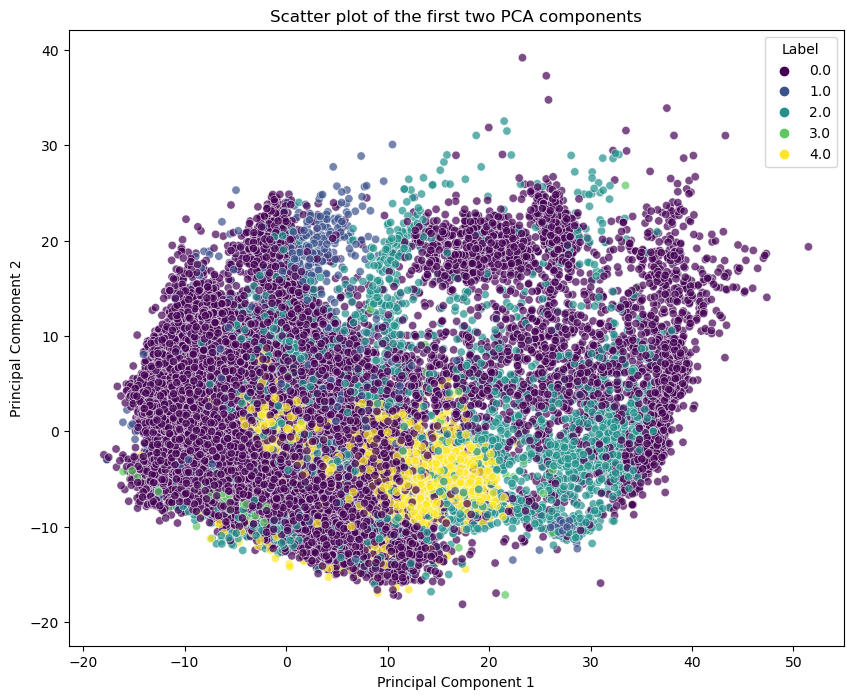

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_train_pca contains the PCA-transformed training data
# and y_train contains the corresponding labels

# Convert to DataFrame for easier plotting
pca_df = pd.DataFrame(X_train_pca, columns=[f'PC{i+1}' for i in range(X_train_pca.shape[1])])
pca_df['label'] = y_train.reset_index(drop=True)  # Reset index to ensure alignment

# Plot the first two principal components
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='label', data=pca_df, palette='viridis', alpha=0.7)
plt.title('Scatter plot of the first two PCA components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label')
plt.show()


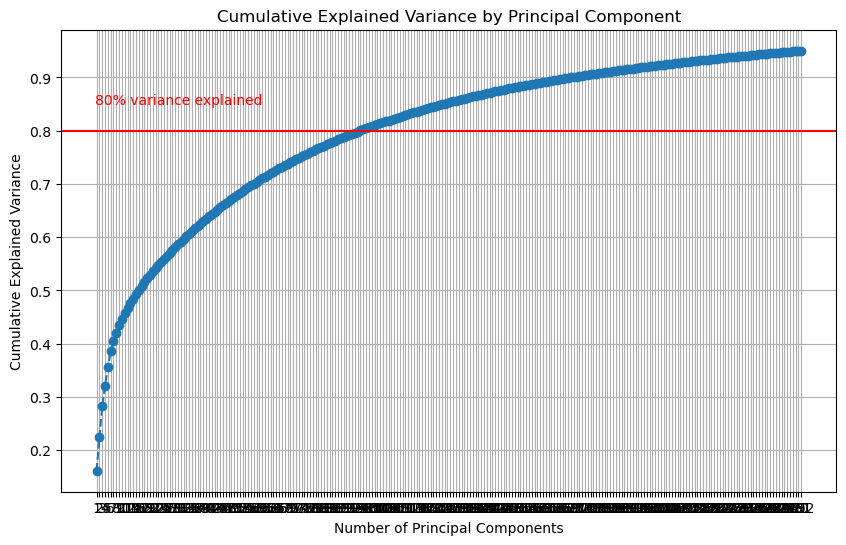

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `pca` is your PCA object after fitting
explained_variances = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variances)+1), explained_variances, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Component')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.xticks(range(1, len(explained_variances) + 1))

# Optional: Add a horizontal line to show 80% variance explained threshold
plt.axhline(y=0.8, color='r', linestyle='-')
plt.text(0.5, 0.85, '80% variance explained', color = 'red')

plt.show()


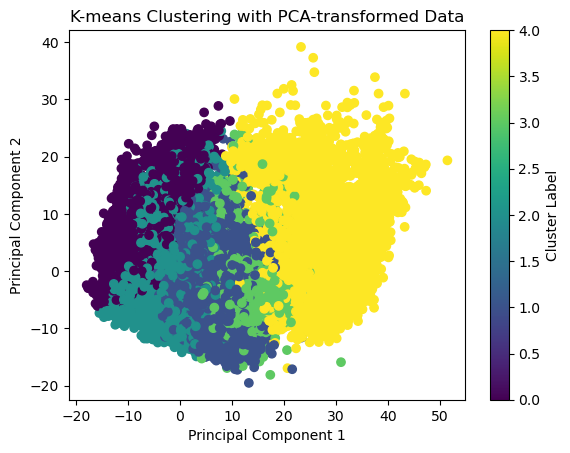

In [24]:
from sklearn.cluster import KMeans

# Choose the number of clusters
k = 5  # example, adjust based on your analysis

# Perform K-means clustering
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_train_pca)

# Get cluster assignments for each data point
labels = kmeans.labels_

# Optionally, visualize the clusters
# This requires dimensionality reduction if you have more than 2 dimensions
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=labels)
plt.title('K-means Clustering with PCA-transformed Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()


## Baseline Logistic Regression

At PCA .80

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming `X_train_pca`, `X_test_pca`, `y_train`, and `y_test` are already defined

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_reg.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_pca)

# Evaluate the model
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Baseline Model Accuracy: 0.9480897721432242

Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97     14579
         1.0       0.86      0.31      0.46       426
         2.0       0.84      0.75      0.79      1112
         3.0       0.84      0.50      0.63       145
         4.0       0.96      0.93      0.94      1249

    accuracy                           0.95     17511
   macro avg       0.89      0.70      0.76     17511
weighted avg       0.95      0.95      0.94     17511



at PCA .95

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming `X_train_pca`, `X_test_pca`, `y_train`, and `y_test` are already defined

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Fit the model on the training data
log_reg.fit(X_train_pca, y_train)

# Predict on the test data
y_pred = log_reg.predict(X_test_pca)

# Evaluate the model
print("Baseline Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Baseline Model Accuracy: 0.9661355719262178

Classification Report:
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98     14579
         1.0       0.86      0.58      0.69       426
         2.0       0.90      0.84      0.87      1112
         3.0       0.80      0.70      0.75       145
         4.0       0.97      0.95      0.96      1249

    accuracy                           0.97     17511
   macro avg       0.90      0.81      0.85     17511
weighted avg       0.96      0.97      0.96     17511

